## Problem Statement:

### 1.)Check eligibility of the Customer given the inputs described above.(Classification)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
train_df = pd.read_csv("training_set.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


#### Drop unnecessary columns(Columns with no statitical importance)

In [3]:
train_df.drop(["Loan_ID"],axis=1,inplace = True)
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 12)

In [5]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


### Missing Data treatment

In [7]:
train_df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Gender               15
Dependents           15
Loan_Amount_Term     14
Married               3
ApplicantIncome       2
Education             1
CoapplicantIncome     1
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
for i in train_df.columns:
    if(train_df[i].dtypes == "object"):
        x = train_df[i].mode()[0]
        train_df[i] = train_df[i].fillna(x)
    else:
        x = train_df[i].mean()
        train_df[i] = train_df[i].fillna(x)

In [9]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outliers

In [10]:
cat = []
con = []
for i in train_df.columns:
    if(train_df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat,con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [12]:
train_cat = train_df[cat]
train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [13]:
train_con = train_df[con]
train_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.00000,0.0,146.412162,360.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0
2,3000.00000,0.0,66.000000,360.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0,1.0
610,4106.00000,0.0,40.000000,180.0,1.0
611,8072.00000,240.0,253.000000,360.0,1.0
612,7583.00000,0.0,187.000000,360.0,1.0


<AxesSubplot:>

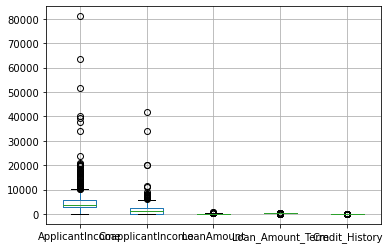

In [14]:
train_con.boxplot()

In [15]:
train_con.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [16]:
outlier = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

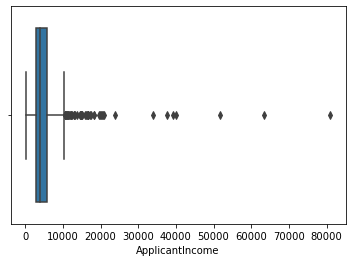

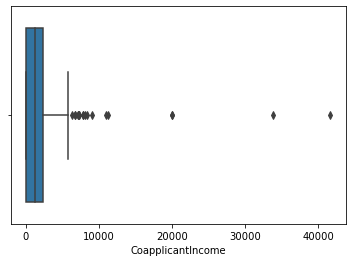

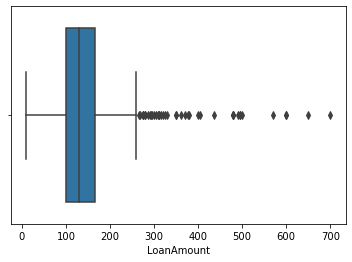

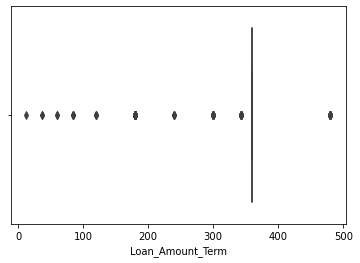

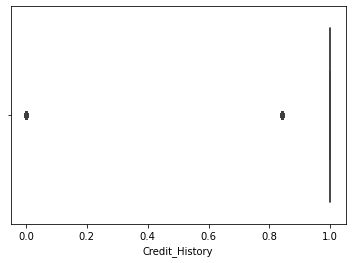

In [17]:
for i in outlier:
    sns.boxplot(train_con[i])
    plt.show()

In [18]:
for i in train_con.columns:
    q1 = train_con[i].quantile(0.25)
    q3 = train_con[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = train_con.loc[(train_con[i]<uppertail)|(train_con[i]>lowertail) ,i].mean()
    train_con.loc[(train_con[i]>uppertail)|(train_con[i]<lowertail) ,i] = mean

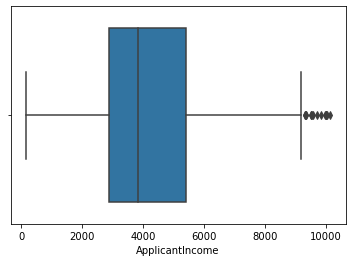

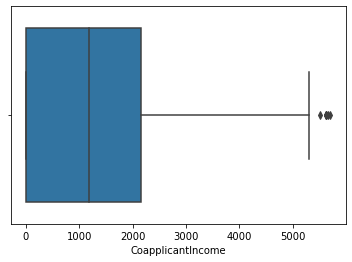

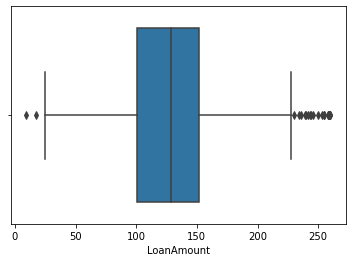

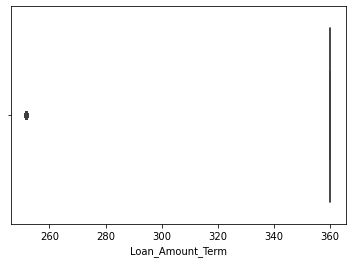

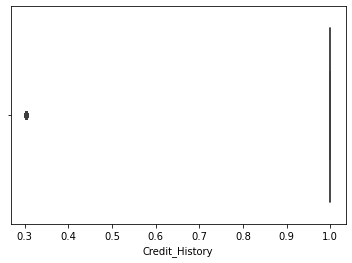

In [19]:
for i in outlier:
    sns.boxplot(train_con[i])
    plt.show()

In [20]:
train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [21]:
train_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.00000,0.0,146.412162,360.000000,1.000000
1,5405.54085,1508.0,128.000000,360.000000,1.000000
2,3000.00000,0.0,66.000000,360.000000,1.000000
3,2583.00000,2358.0,120.000000,360.000000,1.000000
4,6000.00000,0.0,141.000000,360.000000,1.000000
...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.000000,1.000000
610,4106.00000,0.0,40.000000,251.647059,1.000000
611,8072.00000,240.0,253.000000,360.000000,1.000000
612,7583.00000,0.0,187.000000,360.000000,1.000000


In [22]:
ss = StandardScaler()
X1 = ss.fit_transform(train_con)
X1

array([[ 0.86099336, -0.90178987,  0.35642638,  0.44633928,  0.54095432],
       [ 0.62499804,  0.14549635, -0.05190184,  0.44633928,  0.54095432],
       [-0.65515676, -0.90178987, -1.42688158,  0.44633928,  0.54095432],
       ...,
       [ 2.04400554, -0.73511302,  2.72023473,  0.44633928,  0.54095432],
       [ 1.78377479, -0.90178987,  1.25654662,  0.44633928,  0.54095432],
       [ 0.18726712, -0.90178987,  0.05898362,  0.44633928, -1.84858491]])

In [23]:
df = pd.DataFrame(X1,columns=train_con.columns)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.860993,-0.901790,0.356426,0.446339,0.540954
1,0.624998,0.145496,-0.051902,0.446339,0.540954
2,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...
609,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,2.044006,-0.735113,2.720235,0.446339,0.540954
612,1.783775,-0.901790,1.256547,0.446339,0.540954


In [24]:
final_df = pd.concat([train_cat,df],axis=1)
final_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,0.860993,-0.901790,0.356426,0.446339,0.540954
1,Male,Yes,1,Graduate,No,Rural,N,0.624998,0.145496,-0.051902,0.446339,0.540954
2,Male,Yes,0,Graduate,Yes,Urban,Y,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,Male,Yes,0,Not Graduate,No,Urban,Y,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,Male,No,0,Graduate,No,Urban,Y,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,Male,Yes,3+,Graduate,No,Rural,Y,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,Male,Yes,1,Graduate,No,Urban,Y,2.044006,-0.735113,2.720235,0.446339,0.540954
612,Male,Yes,2,Graduate,No,Urban,Y,1.783775,-0.901790,1.256547,0.446339,0.540954


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   Property_Area      614 non-null    object 
 6   Loan_Status        614 non-null    object 
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


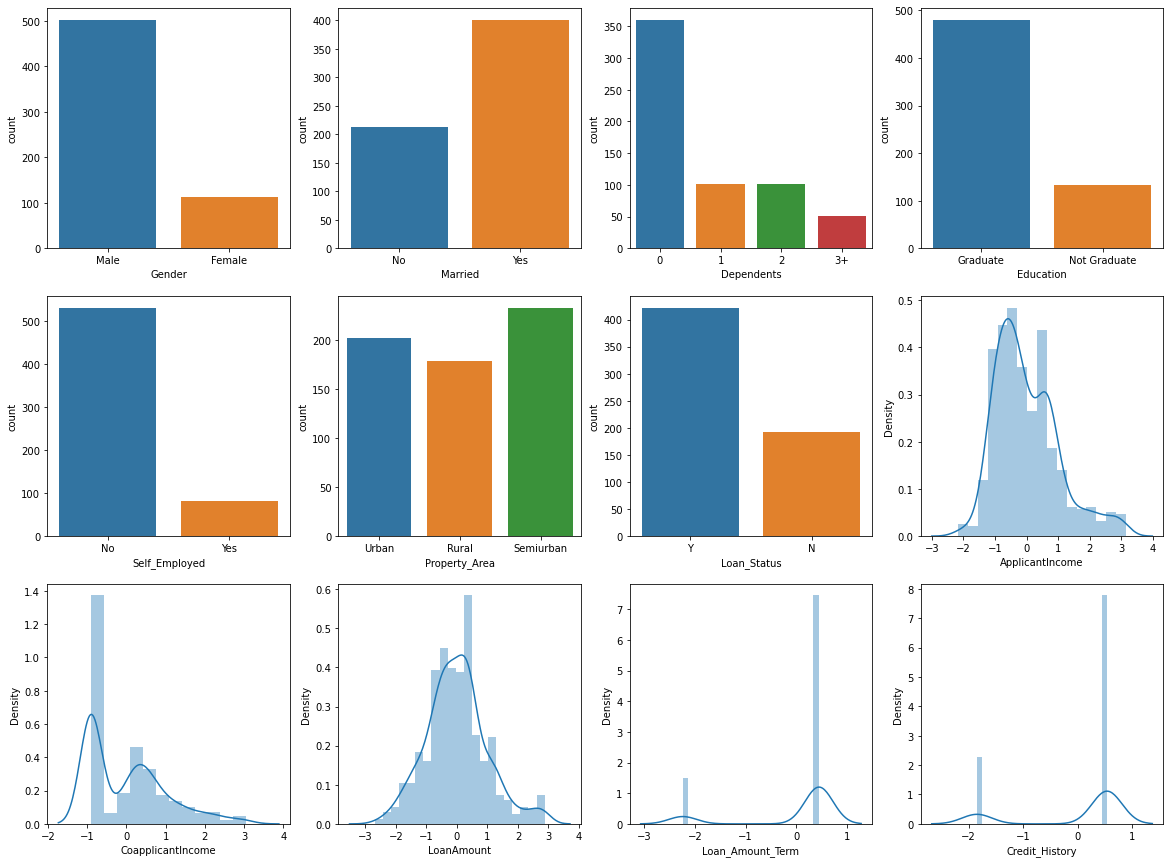

In [26]:
plt.figure(figsize=(20,15))
x=1
for i in final_df.columns:
    if(final_df[i].dtypes=="object"):
        plt.subplot(3,4,x)
        sns.countplot(final_df[i])
        x=x+1
    else:
        plt.subplot(3,4,x)
        sns.distplot(final_df[i])
        x=x+1

In [27]:
final_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [28]:
final_df['Gender'].replace({'Male': 1, 'Female': 0},inplace=True)
final_df['Married'].replace({'Yes': 1, 'No': 0},inplace=True)
final_df['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)
final_df['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)
final_df['Property_Area'].replace({'Semiurban': 0, 'Urban': 1, 'Rural': 2},inplace=True)
final_df['Dependents'].replace({'0': 360, '1': 102, '2': 101, '3+': 51},inplace=True)

In [29]:
final_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,360,1,0,1,Y,0.860993,-0.901790,0.356426,0.446339,0.540954
1,1,1,102,1,0,2,N,0.624998,0.145496,-0.051902,0.446339,0.540954
2,1,1,360,1,1,1,Y,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,1,1,360,0,0,1,Y,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,1,0,360,1,0,1,Y,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,360,1,0,2,Y,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,1,1,51,1,0,2,Y,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,1,1,102,1,0,1,Y,2.044006,-0.735113,2.720235,0.446339,0.540954
612,1,1,101,1,0,1,Y,1.783775,-0.901790,1.256547,0.446339,0.540954


In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   Property_Area      614 non-null    int64  
 6   Loan_Status        614 non-null    object 
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [31]:
y1= final_df[['Loan_Status']]

In [32]:
from PM8wd import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y1)

In [33]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [34]:
y = pd.DataFrame(y,columns=['Loan_Status'])
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [35]:
final_df=final_df.drop(['Loan_Status'],axis=1)
final_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,360,1,0,1,0.860993,-0.901790,0.356426,0.446339,0.540954
1,1,1,102,1,0,2,0.624998,0.145496,-0.051902,0.446339,0.540954
2,1,1,360,1,1,1,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,1,1,360,0,0,1,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,1,0,360,1,0,1,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,360,1,0,2,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,1,1,51,1,0,2,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,1,1,102,1,0,1,2.044006,-0.735113,2.720235,0.446339,0.540954
612,1,1,101,1,0,1,1.783775,-0.901790,1.256547,0.446339,0.540954


In [36]:
x=final_df

In [37]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,360,1,0,1,0.860993,-0.901790,0.356426,0.446339,0.540954
1,1,1,102,1,0,2,0.624998,0.145496,-0.051902,0.446339,0.540954
2,1,1,360,1,1,1,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,1,1,360,0,0,1,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,1,0,360,1,0,1,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,360,1,0,2,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,1,1,51,1,0,2,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,1,1,102,1,0,1,2.044006,-0.735113,2.720235,0.446339,0.540954
612,1,1,101,1,0,1,1.783775,-0.901790,1.256547,0.446339,0.540954


In [38]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


### Splitting of dataset into training and testing data

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25,stratify=y)

### Model instantiate and model training

### Logistic regression

In [40]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

### Model evaluation

In [41]:
# Testing data evaluation
ypredtest = log_model.predict(xtest)

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytest,ypredtest)
print('Precision:',Precision)

Recall = recall_score(ytest,ypredtest)
print('Recall:',Recall)

F1score = f1_score(ytest,ypredtest)
print('F1score:',F1score)

Classification_report = classification_report(ytest,ypredtest)
print('Classification report:\n',Classification_report)

Accuracy: 0.7532467532467533
Confusion matrix: 
 [[23 25]
 [13 93]]
Precision: 0.788135593220339
Recall: 0.8773584905660378
F1score: 0.8303571428571429
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.48      0.55        48
           1       0.79      0.88      0.83       106

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [42]:
# Training data evaluation
ypredtrain = log_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion matrix: \n',confusionmatrix)

Precision = precision_score(ytrain,ypredtrain)
print('Precision:',Precision)

Recall = recall_score(ytrain,ypredtrain)
print('Recall:',Recall)

F1score = f1_score(ytrain,ypredtrain)
print('F1score:',F1score)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification report:\n',Classification_report)

Accuracy: 0.7717391304347826
Confusion matrix: 
 [[ 70  74]
 [ 31 285]]
Precision: 0.7938718662952646
Recall: 0.9018987341772152
F1score: 0.8444444444444446
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.49      0.57       144
           1       0.79      0.90      0.84       316

    accuracy                           0.77       460
   macro avg       0.74      0.69      0.71       460
weighted avg       0.76      0.77      0.76       460



### KNN

In [43]:
Knn_model = KNeighborsClassifier()
Knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [44]:
# Testing data evaluation
ypredtest = Knn_model.predict(xtest)
# ypredtest

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix:\n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report:\n',Classification_report)

Accuracy: 0.7402597402597403
Confusion_matrix:
 [[23 25]
 [15 91]]
Classification_report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.53        48
           1       0.78      0.86      0.82       106

    accuracy                           0.74       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.73      0.74      0.73       154



In [45]:
# Training data evaluation
ypredtrain = Knn_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix:\n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report:\n',Classification_report)

Accuracy: 0.7956521739130434
Confusion_matrix:
 [[ 79  65]
 [ 29 287]]
Classification_report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63       144
           1       0.82      0.91      0.86       316

    accuracy                           0.80       460
   macro avg       0.77      0.73      0.74       460
weighted avg       0.79      0.80      0.79       460



In [46]:
knn_model = KNeighborsClassifier()
hyp_grid = {'n_neighbors':np.arange(3,40),'p':[1,2]}

gscv_knn_model = GridSearchCV(knn_model,hyp_grid,cv=5)
gscv_knn_model.fit(xtrain,ytrain)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [47]:
Knn_model = KNeighborsClassifier(n_neighbors=12, p=1)
Knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=12, p=1)

In [48]:
# Testing data evaluation
ypredtest = Knn_model.predict(xtest)
# ypredtest

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix:\n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report:\n',Classification_report)

Accuracy: 0.7402597402597403
Confusion_matrix:
 [[22 26]
 [14 92]]
Classification_report:
               precision    recall  f1-score   support

           0       0.61      0.46      0.52        48
           1       0.78      0.87      0.82       106

    accuracy                           0.74       154
   macro avg       0.70      0.66      0.67       154
weighted avg       0.73      0.74      0.73       154



In [49]:
# Training data evaluation
ypredtrain = Knn_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix:\n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report:\n',Classification_report)

Accuracy: 0.7652173913043478
Confusion_matrix:
 [[ 66  78]
 [ 30 286]]
Classification_report:
               precision    recall  f1-score   support

           0       0.69      0.46      0.55       144
           1       0.79      0.91      0.84       316

    accuracy                           0.77       460
   macro avg       0.74      0.68      0.70       460
weighted avg       0.75      0.77      0.75       460



### SVC

In [50]:
svc_model = SVC()
svc_model.fit(xtrain,ytrain)

SVC()

In [51]:
# Testing data evaluation
ypredtest = svc_model.predict(xtest)
# ypredtest

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Accuracy: 0.6883116883116883
Confusion_matrix: 
 [[  0  48]
 [  0 106]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.69      1.00      0.82       106

    accuracy                           0.69       154
   macro avg       0.34      0.50      0.41       154
weighted avg       0.47      0.69      0.56       154



In [52]:
# Training data evaluation
ypredtrain = svc_model.predict(xtrain)
# ypredtest

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 0.6869565217391305
Confusion_matrix: 
 [[  0 144]
 [  0 316]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.69      1.00      0.81       316

    accuracy                           0.69       460
   macro avg       0.34      0.50      0.41       460
weighted avg       0.47      0.69      0.56       460



In [53]:
svc_model = SVC()

hyp_grid = {'C':np.arange(0,50),
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

gscv_scv_model = GridSearchCV(svc_model,hyp_grid,cv=5)

gscv_scv_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [54]:
gscv_scv_model.best_estimator_

SVC(C=1, kernel='linear')

In [55]:
svc_model = SVC(C=1, kernel='linear')
svc_model.fit(xtrain,ytrain)

SVC(C=1, kernel='linear')

In [56]:
# Testing data evaluation
ypredtest = svc_model.predict(xtest)
# ypredtest

Accuracy = accuracy_score(ytest,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytest,ypredtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytest,ypredtest)
print('Classification_report: \n',Classification_report)

Accuracy: 0.7532467532467533
Confusion_matrix: 
 [[23 25]
 [13 93]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.64      0.48      0.55        48
           1       0.79      0.88      0.83       106

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [57]:
# Training data evaluation
ypredtrain = svc_model.predict(xtrain)

Accuracy = accuracy_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(ytrain,ypredtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(ytrain,ypredtrain)
print('Classification_report: \n',Classification_report)

Accuracy: 0.7760869565217391
Confusion_matrix: 
 [[ 72  72]
 [ 31 285]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.70      0.50      0.58       144
           1       0.80      0.90      0.85       316

    accuracy                           0.78       460
   macro avg       0.75      0.70      0.71       460
weighted avg       0.77      0.78      0.76       460



### Reading testing data

In [58]:
test_df = pd.read_csv("testing_set.csv")
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [59]:
test_df.drop(["Loan_ID"],axis=1,inplace = True)
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [60]:
test_df.shape

(367, 11)

In [61]:
test_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


### Missing Data treatment

In [63]:
test_df.isna().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [64]:
for i in test_df.columns:
    if(test_df[i].dtypes == "object"):
        x = test_df[i].mode()[0]
        test_df[i] = test_df[i].fillna(x)
    else:
        x = test_df[i].mean()
        test_df[i] = test_df[i].fillna(x)

In [65]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outliers

In [66]:
cat = []
con = []
for i in test_df.columns:
    if(test_df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [67]:
cat,con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [68]:
test_cat = test_df[cat]
test_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [69]:
test_con = test_df[con]
test_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.000000
1,3076,1500,126.0,360.0,1.000000
2,5000,1800,208.0,360.0,1.000000
3,2340,2546,100.0,360.0,0.825444
4,3276,0,78.0,360.0,1.000000
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000
363,4158,709,115.0,360.0,1.000000
364,3250,1993,126.0,360.0,0.825444
365,5000,2393,158.0,360.0,1.000000


<AxesSubplot:>

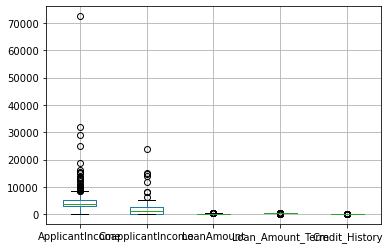

In [70]:
test_con.boxplot()

In [71]:
test_con.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [72]:
outlier =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

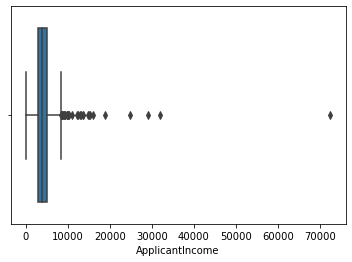

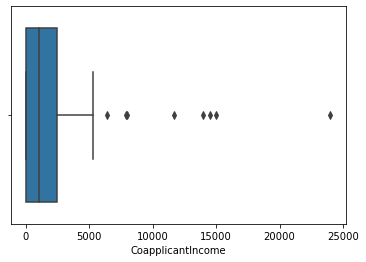

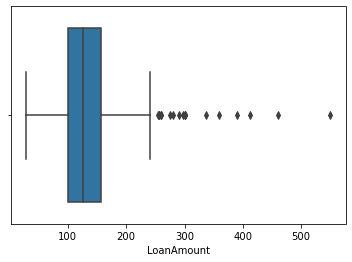

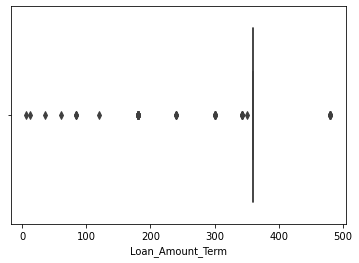

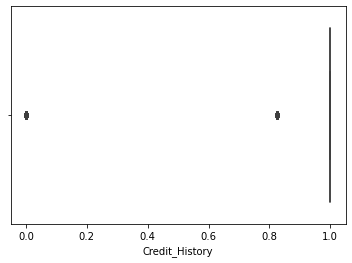

In [73]:
for i in outlier:
    sns.boxplot(test_con[i])
    plt.show()

In [74]:
for i in test_con.columns:
    q1 = test_con[i].quantile(0.25)
    q3 = test_con[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = test_con.loc[(test_con[i]<uppertail)|(test_con[i]>lowertail) ,i].mean()
    test_con.loc[(test_con[i]>uppertail)|(test_con[i]<lowertail) ,i] = mean

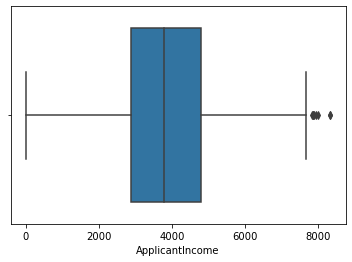

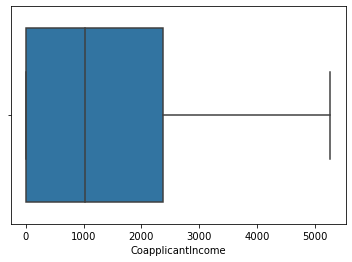

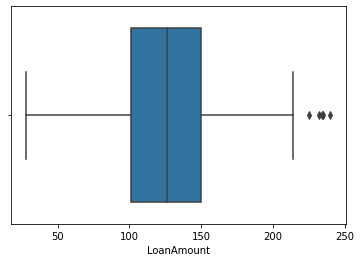

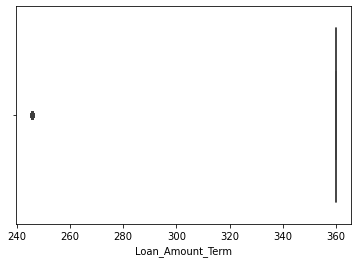

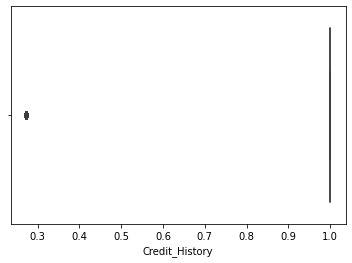

In [75]:
for i in outlier:
    sns.boxplot(test_con[i])
    plt.show()

In [76]:
test_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [77]:
test_con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720.000000,0.0,110.0,360.000000,1.000000
1,3076.000000,1500.0,126.0,360.000000,1.000000
2,5000.000000,1800.0,208.0,360.000000,1.000000
3,2340.000000,2546.0,100.0,360.000000,0.272021
4,3276.000000,0.0,78.0,360.000000,1.000000
...,...,...,...,...,...
362,4009.000000,1777.0,113.0,360.000000,1.000000
363,4158.000000,709.0,115.0,360.000000,1.000000
364,3250.000000,1993.0,126.0,360.000000,0.272021
365,5000.000000,2393.0,158.0,360.000000,1.000000


In [78]:
ss = StandardScaler()
X1 = ss.fit_transform(test_con)
X1

array([[ 1.19316735, -0.92192969, -0.42604821,  0.42433985,  0.56161569],
       [-0.56882817,  0.11998457, -0.02280272,  0.42433985,  0.56161569],
       [ 0.71335012,  0.32836742,  2.04383042,  0.42433985,  0.56161569],
       ...,
       [-0.45287234,  0.46242706, -0.02280272,  0.42433985, -1.78057703],
       [ 0.71335012,  0.74027086,  0.78368826,  0.42433985,  0.56161569],
       [ 0.5837991 , -0.92192969, -0.72848232, -2.35660167,  0.56161569]])

In [79]:
df_test = pd.DataFrame(X1,columns=test_con.columns)
df_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.193167,-0.921930,-0.426048,0.424340,0.561616
1,-0.568828,0.119985,-0.022803,0.424340,0.561616
2,0.713350,0.328367,2.043830,0.424340,0.561616
3,-1.059308,0.846546,-0.678077,0.424340,-1.780577
4,-0.435546,-0.921930,-1.232539,0.424340,0.561616
...,...,...,...,...,...
362,0.052935,0.312391,-0.350440,0.424340,0.561616
363,0.152231,-0.429452,-0.300034,0.424340,0.561616
364,-0.452872,0.462427,-0.022803,0.424340,-1.780577
365,0.713350,0.740271,0.783688,0.424340,0.561616


In [80]:
final_df_test = pd.concat([test_cat,df_test],axis=1)
final_df_test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,Yes,0,Graduate,No,Urban,1.193167,-0.921930,-0.426048,0.424340,0.561616
1,Male,Yes,1,Graduate,No,Urban,-0.568828,0.119985,-0.022803,0.424340,0.561616
2,Male,Yes,2,Graduate,No,Urban,0.713350,0.328367,2.043830,0.424340,0.561616
3,Male,Yes,2,Graduate,No,Urban,-1.059308,0.846546,-0.678077,0.424340,-1.780577
4,Male,No,0,Not Graduate,No,Urban,-0.435546,-0.921930,-1.232539,0.424340,0.561616
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban,0.052935,0.312391,-0.350440,0.424340,0.561616
363,Male,Yes,0,Graduate,No,Urban,0.152231,-0.429452,-0.300034,0.424340,0.561616
364,Male,No,0,Graduate,No,Semiurban,-0.452872,0.462427,-0.022803,0.424340,-1.780577
365,Male,Yes,0,Graduate,No,Rural,0.713350,0.740271,0.783688,0.424340,0.561616


In [81]:
final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   Property_Area      367 non-null    object 
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
dtypes: float64(5), object(6)
memory usage: 31.7+ KB


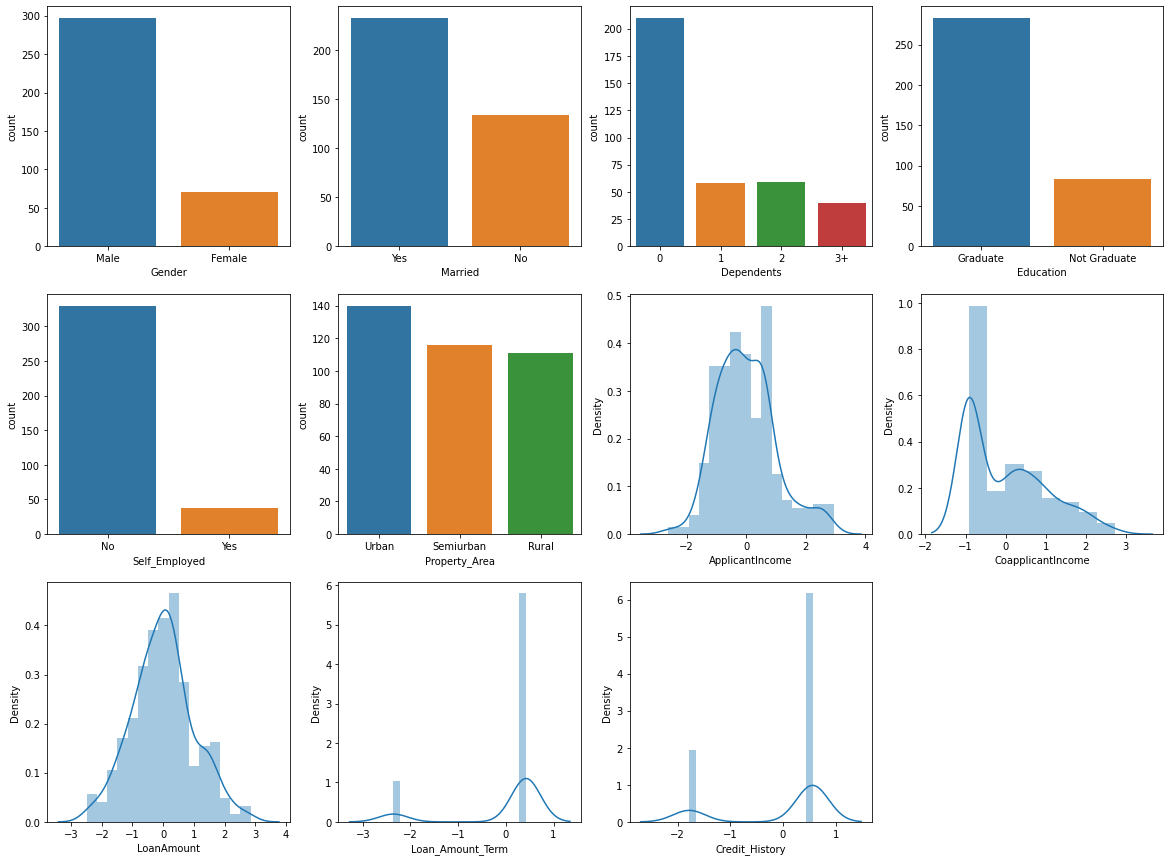

In [82]:
plt.figure(figsize=(20,15))
x=1
for i in final_df_test.columns:
    if(final_df_test[i].dtypes=="object"):
        plt.subplot(3,4,x)
        sns.countplot(final_df_test[i])
        x=x+1
    else:
        plt.subplot(3,4,x)
        sns.distplot(final_df_test[i])
        x=x+1

In [83]:
final_df_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [84]:
final_df_test['Gender'].replace({'Male': 1, 'Female': 0},inplace=True)
final_df_test['Married'].replace({'Yes': 1, 'No': 0},inplace=True)
final_df_test['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)
final_df_test['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)
final_df_test['Property_Area'].replace({'Semiurban': 0, 'Urban': 1, 'Rural': 2},inplace=True)
final_df_test['Dependents'].replace({'0': 360, '1': 102, '2': 101, '3+': 51},inplace=True)

In [85]:
final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   Property_Area      367 non-null    int64  
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 31.7 KB


## Final Predictions

In [86]:
Predictions = log_model.predict(final_df_test)
Predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [87]:
Final = le.inverse_transform(Predictions)
Final_pred = pd.DataFrame(Final,columns=['Loan_Status'])
Final_pred

,Loan_Status
0,Y
1,Y
2,Y
3,N
4,Y
...,...
362,Y
363,Y
364,N
365,Y


In [88]:
A= pd.read_csv("testing_set.csv")
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [89]:
B = A[['Loan_ID']]
B

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [90]:
pd.options.display.max_rows=367

In [91]:
loan_predictions = pd.concat([B,Final_pred],axis=1)
loan_predictions

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [92]:
File_name = 'Final loan predictions.xlsx'
Final_submit = loan_predictions.to_excel(File_name)

## 2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [93]:
from sklearn.cluster import KMeans

In [94]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.860993,-0.901790,0.356426,0.446339,0.540954
1,0.624998,0.145496,-0.051902,0.446339,0.540954
2,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...
609,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,2.044006,-0.735113,2.720235,0.446339,0.540954
612,1.783775,-0.901790,1.256547,0.446339,0.540954


In [95]:
x = df

In [96]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.860993,-0.901790,0.356426,0.446339,0.540954
1,0.624998,0.145496,-0.051902,0.446339,0.540954
2,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,0.941351,-0.901790,0.236400,0.446339,0.540954
...,...,...,...,...,...
609,-0.708374,-0.901790,-1.315996,0.446339,0.540954
610,-0.066578,-0.901790,-2.003486,-2.240448,0.540954
611,2.044006,-0.735113,2.720235,0.446339,0.540954
612,1.783775,-0.901790,1.256547,0.446339,0.540954


In [97]:
kmeans_model = KMeans(n_clusters=3) 
kmeans_model.fit(x)

KMeans(n_clusters=3)

In [98]:
kmeans_model.inertia_

1954.351551601285

In [99]:
y_var = kmeans_model.fit_predict(x)
y_var

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0,

In [100]:
index_0 = np.where(y_var==0)
index_0

(array([  7,  17,  20,  22,  23,  24,  30,  42,  48,  54,  63,  64,  69,
         79,  83,  86,  95, 108, 117, 122, 125, 129, 138, 150, 156, 162,
        177, 180, 181, 187, 198, 201, 211, 218, 219, 220, 236, 237, 250,
        254, 256, 259, 260, 267, 279, 280, 291, 300, 307, 309, 317, 318,
        323, 325, 326, 338, 346, 348, 353, 377, 387, 392, 395, 396, 399,
        409, 411, 412, 414, 431, 438, 448, 449, 450, 452, 460, 464, 473,
        477, 486, 490, 491, 494, 499, 503, 506, 517, 527, 530, 532, 533,
        541, 544, 548, 550, 553, 556, 564, 565, 567, 569, 571, 576, 583,
        584, 589, 597, 613], dtype=int64),)

In [101]:
cluster_0 = x.iloc[index_0]
cluster_0.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
7,-0.635999,0.837205,0.613411,0.446339,-1.848585
17,-0.383750,-0.901790,-1.205111,0.446339,-1.848585
20,1.824752,-0.901790,-0.584152,0.446339,-1.848585
22,-0.868024,0.425375,-0.318027,0.446339,-1.848585
23,-0.460915,0.429541,-0.406735,0.446339,-1.848585


In [102]:
index_1 = np.where(y_var==1)
index_1

(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
         15,  18,  21,  25,  26,  27,  28,  29,  31,  32,  33,  34,  35,
         37,  38,  39,  40,  41,  43,  46,  47,  49,  50,  51,  52,  53,
         55,  56,  57,  58,  59,  60,  61,  65,  67,  70,  71,  74,  76,
         77,  80,  81,  82,  85,  87,  88,  89,  90,  92,  93,  96,  97,
         99, 101, 102, 103, 104, 105, 106, 107, 110, 111, 113, 114, 116,
        118, 119, 120, 121, 123, 124, 126, 127, 131, 132, 134, 135, 136,
        137, 139, 140, 141, 143, 145, 146, 147, 148, 149, 151, 152, 153,
        154, 157, 158, 159, 160, 161, 163, 166, 167, 169, 170, 173, 174,
        175, 176, 178, 183, 184, 185, 188, 190, 191, 192, 193, 194, 195,
        196, 199, 200, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213,
        214, 215, 216, 217, 221, 222, 224, 225, 226, 227, 229, 230, 233,
        234, 235, 238, 239, 240, 243, 244, 246, 249, 251, 252, 255, 257,
        258, 261, 263, 264, 265, 266, 268, 269, 270

In [103]:
cluster_1 = x.iloc[index_1]
cluster_1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.860993,-0.901790,0.356426,0.446339,0.540954
1,0.624998,0.145496,-0.051902,0.446339,0.540954
2,-0.655157,-0.901790,-1.426882,0.446339,0.540954
3,-0.877071,0.735810,-0.229319,0.446339,0.540954
4,0.941351,-0.901790,0.236400,0.446339,0.540954


In [104]:
index_2 = np.where(y_var==2)
index_2

(array([ 14,  16,  19,  36,  44,  45,  62,  66,  68,  72,  73,  75,  78,
         84,  91,  94,  98, 100, 109, 112, 115, 128, 130, 133, 142, 144,
        155, 164, 165, 168, 171, 172, 179, 182, 186, 189, 197, 202, 223,
        228, 231, 232, 241, 242, 245, 247, 248, 253, 262, 282, 286, 293,
        298, 313, 315, 333, 334, 335, 355, 358, 363, 366, 367, 372, 373,
        375, 378, 385, 393, 400, 401, 408, 421, 423, 429, 435, 444, 451,
        453, 461, 466, 471, 476, 495, 497, 500, 504, 513, 516, 539, 540,
        546, 554, 573, 575, 585, 590, 591, 593, 600, 605, 610], dtype=int64),)

In [105]:
cluster_2 = x.iloc[index_2]
cluster_2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
14,-1.560377,-0.147577,-2.513559,-2.240448,0.540954
16,-0.337984,-0.901790,-0.672860,-2.240448,-1.848585
19,-0.868024,1.528914,-0.340204,-2.240448,0.540954
36,-1.278859,0.021878,-0.672860,-2.240448,-1.848585
44,0.246870,-0.901790,-0.761569,-2.240448,0.540954


In [106]:
WCSS_list = []
for k in range(3,10):
    kmeans_model = KMeans(n_clusters=k)  
    kmeans_model.fit(x)
    WCSS = kmeans_model.inertia_
    WCSS_list.append(WCSS)
    print('K >>',k,'WCSS>>',WCSS)

K >> 3 WCSS>> 1954.351551601285
K >> 4 WCSS>> 1558.5449808383921
K >> 5 WCSS>> 1291.8315703568762
K >> 6 WCSS>> 1169.8382337880557
K >> 7 WCSS>> 1076.5221632060523
K >> 8 WCSS>> 954.6266085321863
K >> 9 WCSS>> 862.7484266079543


In [107]:
WCSS

862.7484266079543

In [108]:
WCSS_list

[1954.351551601285,
 1558.5449808383921,
 1291.8315703568762,
 1169.8382337880557,
 1076.5221632060523,
 954.6266085321863,
 862.7484266079543]

Text(0.5, 1.0, 'Elbow method graph')

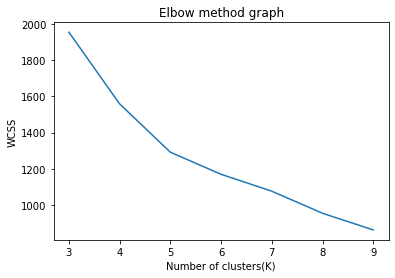

In [109]:
k = range(3,10)
plt.plot(k,WCSS_list)
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.title('Elbow method graph')

In [110]:
kmeans_model = KMeans(n_clusters=5) 
kmeans_model.fit(x)

KMeans(n_clusters=5)

In [111]:
y_means = kmeans_model.fit_predict(x)
y_means

array([2, 0, 1, 0, 2, 0, 1, 4, 0, 2, 1, 1, 0, 0, 3, 2, 3, 4, 1, 3, 4, 0,
       4, 4, 4, 2, 0, 1, 1, 0, 4, 1, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 4, 0,
       3, 3, 1, 2, 4, 0, 1, 1, 1, 1, 4, 1, 1, 0, 2, 0, 0, 1, 3, 4, 4, 0,
       3, 2, 3, 4, 0, 1, 3, 3, 2, 3, 0, 0, 3, 4, 1, 1, 0, 4, 3, 0, 4, 0,
       2, 0, 0, 3, 1, 1, 3, 4, 0, 1, 3, 0, 3, 0, 2, 0, 0, 1, 2, 2, 4, 3,
       2, 0, 3, 2, 1, 3, 0, 4, 0, 2, 0, 1, 4, 1, 0, 4, 2, 0, 3, 4, 3, 1,
       1, 3, 1, 0, 1, 0, 4, 0, 0, 2, 3, 0, 3, 0, 1, 1, 2, 1, 4, 0, 2, 1,
       1, 3, 4, 2, 0, 0, 1, 2, 4, 0, 3, 3, 1, 0, 3, 2, 1, 3, 3, 0, 1, 0,
       1, 4, 1, 3, 4, 4, 3, 2, 1, 0, 3, 4, 0, 2, 1, 2, 2, 1, 1, 0, 2, 3,
       4, 1, 0, 4, 3, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 0, 1, 0, 0, 4, 4,
       4, 0, 0, 3, 2, 1, 1, 2, 3, 2, 0, 3, 3, 2, 0, 2, 4, 4, 1, 1, 0, 3,
       3, 2, 0, 3, 2, 3, 3, 1, 4, 1, 0, 3, 4, 2, 4, 1, 0, 4, 4, 0, 3, 2,
       1, 0, 0, 4, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 4, 4, 1, 3, 1, 2, 0,
       3, 0, 1, 2, 0, 4, 0, 3, 0, 1, 2, 1, 3, 0, 4,

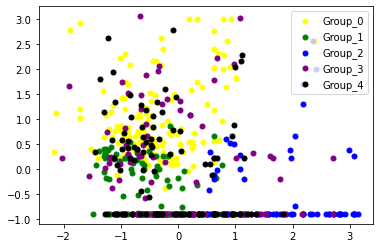

In [112]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=25,c='yellow',label="Group_0")
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=25,c='green',label="Group_1")
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=25,c='blue',label="Group_2")
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=25,c='purple',label="Group_3")
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=25,c='black',label="Group_4")
plt.legend()
plt.show()

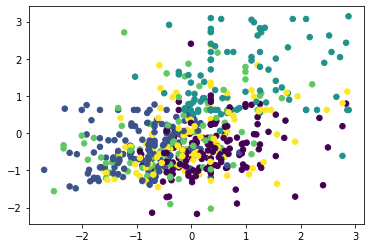

In [113]:
plt.scatter(final_df['LoanAmount'],final_df['ApplicantIncome'],s=30,c=y_means)

### Final predictions

In [114]:
final_df_test.shape

(367, 11)

In [115]:
kmeans_model = KMeans(n_clusters=5) 
y_pred_clusters=kmeans_model.fit_predict(final_df_test)

In [116]:
y_pred_clusters

array([1, 0, 0, 0, 1, 3, 0, 0, 0, 3, 1, 0, 2, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       1, 1, 3, 4, 0, 3, 4, 3, 1, 0, 3, 3, 1, 4, 0, 3, 1, 3, 1, 1, 3, 3,
       1, 4, 3, 3, 3, 2, 0, 2, 0, 0, 1, 4, 1, 0, 0, 2, 3, 1, 0, 4, 2, 3,
       4, 4, 3, 4, 1, 1, 0, 3, 3, 3, 3, 1, 0, 3, 2, 2, 0, 1, 4, 0, 3, 1,
       0, 3, 4, 2, 0, 0, 0, 2, 0, 3, 2, 2, 1, 4, 0, 0, 4, 3, 4, 2, 1, 3,
       1, 1, 1, 0, 3, 2, 3, 0, 4, 0, 1, 3, 2, 4, 4, 1, 4, 0, 1, 0, 3, 1,
       0, 0, 1, 1, 0, 0, 1, 2, 4, 2, 2, 4, 0, 1, 1, 4, 0, 1, 3, 1, 1, 0,
       0, 3, 0, 3, 0, 1, 3, 4, 1, 1, 0, 4, 0, 3, 2, 0, 1, 0, 1, 4, 4, 0,
       0, 4, 0, 2, 0, 3, 0, 0, 2, 4, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 3,
       0, 1, 1, 2, 4, 3, 1, 3, 0, 0, 1, 0, 1, 4, 2, 1, 3, 3, 3, 3, 0, 0,
       4, 3, 0, 0, 0, 1, 1, 0, 3, 2, 3, 3, 1, 0, 1, 4, 4, 0, 0, 1, 1, 4,
       1, 4, 1, 4, 0, 1, 1, 1, 2, 1, 0, 0, 0, 4, 1, 3, 3, 0, 2, 3, 4, 0,
       0, 4, 0, 0, 0, 1, 2, 3, 0, 0, 4, 2, 1, 1, 2, 3, 3, 1, 4, 1, 0, 0,
       4, 3, 1, 0, 3, 0, 1, 4, 0, 1, 1, 1, 0, 0, 0,

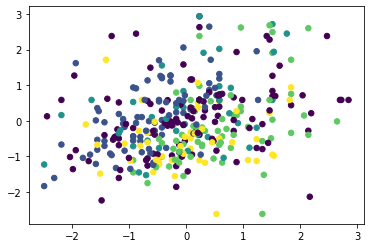

In [117]:
plt.scatter(final_df_test['LoanAmount'],final_df_test['ApplicantIncome'],s=30,c=y_pred_clusters)

## 3.)If customer is not eligible for the input required amount and duration:
### a.)what can be amount for the given duration.(Regression)

In [118]:
A = pd.read_csv("training_set.csv")
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [119]:
B = pd.read_csv("testing_set.csv")
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [120]:
Bnew = pd.concat([B,Final_pred],axis=1)
Bnew

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y


In [121]:
P1 = A[A.Loan_Status == "Y"]
P2 = Bnew[Bnew.Loan_Status == "Y"]
trd = pd.concat([P1,P2])

In [122]:
from PM8wd import replacer
replacer(trd)

In [123]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)


In [124]:
cat,con

(['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [125]:
cat.remove("Loan_ID")
con.remove("LoanAmount")
cat.remove("Loan_Status")

### Defining X & Y

In [126]:
Y = trd[["LoanAmount"]]
X = trd.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)

In [127]:
from PM8wd import catconsep
cat,con=catconsep(X)

In [128]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X2.index = range(0,706)
Xnew = X1.join(X2)

In [129]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [130]:
trd.corr()[["LoanAmount"]]

,LoanAmount
ApplicantIncome,0.560337
CoapplicantIncome,0.161257
LoanAmount,1.000000
Loan_Amount_Term,0.056947
Credit_History,-0.063371


### Building Linear Regression model

In [131]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [132]:
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
train_error = mean_absolute_error(ytrain,train_pred)
test_error = mean_absolute_error(ytest,test_pred)

In [133]:
train_error

36.240218686966784

In [134]:
test_error

39.818252165176

### Prepare Data for making predictions

In [135]:
test = Bnew[Bnew.Loan_Status == "N"]
test = test.drop(labels=["Loan_Status","Loan_ID","LoanAmount"],axis=1)

In [136]:
replacer(test)
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [137]:
Xnew.shape

(706, 19)

In [138]:
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X2.index = range(0,83)
Xnew = X1.join(X2)

In [139]:
pred = model.predict(Xnew)
pred

array([[141.92026193],
       [130.24373601],
       [101.24705247],
       [237.64266407],
       [215.3388571 ],
       [157.0034713 ],
       [107.99855113],
       [156.97614417],
       [102.857816  ],
       [151.31943736],
       [105.85641801],
       [123.00633749],
       [127.34317224],
       [149.41969931],
       [142.36458186],
       [148.05256968],
       [116.18913097],
       [155.81051267],
       [170.21564953],
       [126.44493307],
       [110.80197442],
       [100.16435437],
       [149.09870601],
       [128.8172318 ],
       [104.61319688],
       [133.66895847],
       [141.41787158],
       [209.07103944],
       [144.72866969],
       [120.78624892],
       [129.14215821],
       [153.79121573],
       [460.73964522],
       [169.75069397],
       [115.08050846],
       [105.92175678],
       [114.69136816],
       [ 79.80091255],
       [ 91.0690905 ],
       [127.78341981],
       [ 99.87108025],
       [111.74623354],
       [106.29266223],
       [264

### b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [140]:
test = Bnew[Bnew.Loan_Amount_Term <= 240]
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban,N
19,LP001115,Male,No,0,Graduate,No,1300,3470,100.0,180.0,1.0,Semiurban,Y
21,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban,Y
29,LP001176,Male,No,0,Graduate,No,2942,2382,125.0,180.0,1.0,Urban,Y
36,LP001208,Male,Yes,2,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban,Y
53,LP001298,Male,Yes,2,Graduate,No,4116,1000,30.0,180.0,1.0,Urban,Y
57,LP001321,Male,Yes,2,Graduate,No,3613,3539,134.0,180.0,1.0,Semiurban,Y
59,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,180.0,1.0,Semiurban,Y
72,LP001375,Male,Yes,1,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban,Y


In [141]:
test.index = range(0,34)

In [142]:
replacer(A)
Y = A[["Loan_Amount_Term"]]
X = A.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [143]:
X.shape

(614, 10)

In [144]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [145]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [146]:
replacer(test)
X = test.drop(labels=["Loan_Amount_Term","Loan_ID",'Loan_Status'],axis=1)
Xnew = preprocessing(X)

lm.predict(Xnew)

array([[324.21788608],
       [306.80890461],
       [331.42363501],
       [304.3670905 ],
       [330.45520523],
       [293.55491951],
       [309.4263263 ],
       [317.56886133],
       [313.68065404],
       [304.8008166 ],
       [354.53589083],
       [258.523247  ],
       [330.18491374],
       [343.25183106],
       [341.0378819 ],
       [295.03543673],
       [341.78804347],
       [312.91111568],
       [338.37411727],
       [337.89141007],
       [313.64114129],
       [329.07589334],
       [331.54133407],
       [349.42928605],
       [351.18182275],
       [333.55880422],
       [332.47050013],
       [309.36918428],
       [338.67271505],
       [292.082118  ],
       [298.81149131],
       [306.18530706],
       [314.54103121],
       [322.21706427]])